In [6]:
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf

In [2]:
data.generate_lorenz_63()

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.04882146,  1.52400084,  0.97311434],
       [ 1.18686549,  2.08854554,  0.96173738],
       ...,
       [ 5.09791951,  8.24724399, 15.98720805],
       [ 5.7721776 ,  9.37174157, 16.08926548],
       [ 6.53959511, 10.61673822, 16.45210509]])

In [3]:
data.generate_roessler()

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 5.97127726e-01,  1.27051727e+00,  1.14564911e-02],
       [ 1.87037945e-01,  1.43011517e+00,  5.66814795e-03],
       ...,
       [-1.63908274e+00,  2.03303465e+01,  5.42330280e-03],
       [-7.66556859e+00,  1.95311515e+01,  4.02566532e-03],
       [-1.31801205e+01,  1.69361541e+01,  3.26766733e-03]])

In [7]:
lorenz_test = data.generate_lorenz_63()
lorenz_test_acf = acf.compute_acf(lorenz_test, "x", "x", l=1)
lorenz_test_acf

8930.449779749038

In [8]:
lorenz_test_acfs = acf.compute_acfs(lorenz_test, "x", "x")
lorenz_test_acfs

array([9.06306932e+03, 8.93044978e+03, 8.54738721e+03, ...,
       4.60057720e-03, 3.09139548e-03, 1.65854236e-03])

In [14]:
roessler_test = data.generate_roessler()
roessler_test_acf = acf.compute_acf(roessler_test, "x", "x", l=1)
roessler_test_acf

65759.60688484713

In [15]:
roessler_test_acfs = acf.compute_acfs(roessler_test, "x", "x")
roessler_test_acfs

array([7.14152800e+04, 6.57596069e+04, 5.21991323e+04, ...,
       5.20568369e-03, 2.65046948e-02, 4.14789655e-02])

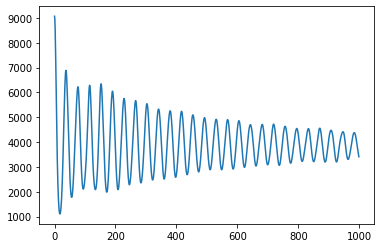

In [21]:
plt.figure(facecolor="white")

plt.plot(lorenz_test_acfs[0:1000])

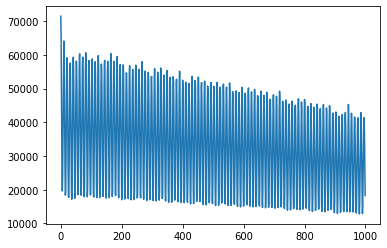

In [22]:
plt.figure(facecolor="white")

plt.plot(roessler_test_acfs[0:1000])